# HW2 - Q1: Least Squares Regression (30 points)
Notes:
* Question (a) needs to be typewritten.
* Questions (b), (c), and (d) need to be programmed.
* Important:
  * Write all the steps of the solution. 
  * Use proper LATEX formatting and notation for all mathematical equations, vectors, and matrices. 
* For programming solution:
  * Properly add comments to your code.

#### <font color="red">A note about notation:</font>
The notations in this homework are slightly different from the lecture notes. In lecture, we use notation for data as: $(t_i, y_i)$ with regressor $\hat{y}=x^\top t$, $x$ is a vector of unknown coefficients and solve $Ax=b$.\
In this homework, the notation that we use for data is: $(x_i, y_i)$ with regressor $\hat{y}=\beta^\top x$ and $\beta$ is a vector of unknown coefficients to be solved.




---



### **(a)** Consider a dataset with $m$ datapoints: $(x_i, y_i), i=1,...,m$. Perform the multivariate calculus derivation of the least squares regression formula for an estimation function $𝑦̂(𝑥)=𝑎𝑥^2+𝑏𝑥+𝑐$, where $a,b, \text{and } c$ are the scalar parameters. (6 points)

#### <font color="red">Your answer here:</font>

$$\hat{y}(x) = ax^2 + bx + c  \tag{1}$$

To solve the unknown parameters $a,b, \text{and } c$ of the function **(1)** that best fits the data $\{(x_i, y_i)\}_{i=1}^m$, we define the least squares loss function as:  

$$
\begin{aligned}

\phi(a,b,c) &= \sum_{i=1}^m (y_i - \overbrace{(ax_i^2 + bx_i +c)}^{\hat{y_i}})^2 \\
&= \sum_{i=1}^m (y_i - ax_i^2 - bx_i - c)^2  \tag{2}

\end{aligned}
$$

Find the parameters $a,b, \text{and } c$ that minimize **(2)** s.t.  

$$\frac{\partial \phi}{\partial a} = \frac{\partial \phi}{\partial b} = \frac{\partial \phi}{\partial c} = 0  \tag{3}$$  

$\nabla \phi(a,b,c) = 0$ yields:  

$$
\begin{aligned}
\frac{\partial \phi}{\partial a} &= -2 \sum_{i=1}^m x_i^2(y_i - ax_i^2 -bx_1 -c) = 0 \\
&= a\sum_{i=1}^mx_i^4 + b\sum_{i=1}^mx_i^3 + c\sum_{i=1}^mx_i^2 = \sum_{i=1}^mx_i^2y_i \\

\\\\

\frac{\partial \phi}{\partial b} &= -2 \sum_{i=1}^m x_i(y_i - ax_i^2 -bx_1 -c) = 0 \\
&= a\sum_{i=1}^mx_i^3 + b\sum_{i=1}^mx_i^2 + c\sum_{i=1}^mx_i = \sum_{i=1}^mx_iy_i \\

\\\\

\frac{\partial \phi}{\partial c} &= -2 \sum_{i=1}^m (y_i - ax_i^2 -bx_1 -c) = 0 \\
&= a\sum_{i=1}^mx_i^2 + b\sum_{i=1}^mx_i + cm = \sum_{i=1}^my_i  

\tag{4}

\end{aligned}
$$

written in matrix form:  

$$
\begin{aligned}

\begin{bmatrix}
\displaystyle\sum_{i=1}^m x_i^4 & \displaystyle\sum_{i=1}^m x_i^3 & \displaystyle\sum_{i=1}^m x_i^2 \\
\displaystyle\sum_{i=1}^m x_i^3 & \displaystyle\sum_{i=1}^m x_i^2 & \displaystyle\sum_{i=1}^m x_i \\
\displaystyle\sum_{i=1}^m x_i^2 & \displaystyle\sum_{i=1}^m x_i & m \\
\end{bmatrix}

\begin{bmatrix}
a \\ b \\ c
\end{bmatrix}

&=

\begin{bmatrix}
\displaystyle\sum_{i=1}^m x_i^2y_i\\
\displaystyle\sum_{i=1}^m x_iy_i\\
\displaystyle\sum_{i=1}^m y_i\\
\end{bmatrix}

\\\\

\begin{bmatrix}
a \\ b \\ c
\end{bmatrix}

&=

\begin{bmatrix}
\displaystyle\sum_{i=1}^m x_i^4 & \displaystyle\sum_{i=1}^m x_i^3 & \displaystyle\sum_{i=1}^m x_i^2 \\
\displaystyle\sum_{i=1}^m x_i^3 & \displaystyle\sum_{i=1}^m x_i^2 & \displaystyle\sum_{i=1}^m x_i \\
\displaystyle\sum_{i=1}^m x_i^2 & \displaystyle\sum_{i=1}^m x_i & m \\
\end{bmatrix}^{-1}

\begin{bmatrix}
\displaystyle\sum_{i=1}^m x_i^2y_i\\
\displaystyle\sum_{i=1}^m x_iy_i\\
\displaystyle\sum_{i=1}^m y_i\\
\end{bmatrix}

\tag{5}

\end{aligned}
$$



---


### **(b)** In this problem, we would like to use a linear regressor to fit the data, where $\hat{y}(x)=ax+b$ with $a,b,x$ being scalars. Denote $\beta_{LS} = \begin{bmatrix} a \\ b \end{bmatrix}$ to contain the regressor coefficients, and recall that the linear algebraic formula for least squares gives $\beta_{LS} = (A^\top A)^{-1} A^\top y$ with $A^\dagger=(A^\top A)^{-1} A^\top$ known as the pseudo-inverse of $A$. 

### In this problem, we ask you to 
### **#1.** Use the function `np.linalg.pinv` to find the values of regressor coefficients $\beta_{LS} $ and match it with your previous result. Note that the following piece of starter code generates a random least squares regression dataset with 500 data-points. 


### **#2.** Further match your results by directly solving the problem using the builtin numpy function: `np.linalg.lstsq`
### **#3.** Plot a graph between $X$ and $y$, and overlay it with the linear regression line. (6 points)

In [1]:
### !!! DO NOT EDIT !!!
# starter code to generate a random least squares regression dataset with 500 points
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
from sklearn import datasets

# generate x and y
X, y = datasets.make_regression(
    n_samples=500,
    n_features=1,
    n_informative=1,
    n_targets=1,
    bias=10,
    noise=25,
    random_state=42,
    coef=False,
)
print("Shape of X is:", X.shape)
print("Shape of y is:", y.shape)


Shape of X is: (500, 1)
Shape of y is: (500,)


#1. psuedo inverse solution:	[ 9.02058667 63.18605572]
#2. least squares solution:	[ 9.02058667 63.18605572]


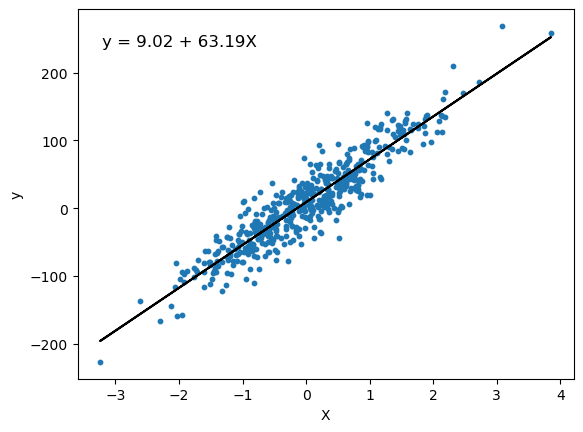

In [2]:
# !!! YOUR CODE HERE !!!

# 1. use np.linalg.pinv to find the values of regressor coefficients beta_ls

# add intercept to X
X_inter = np.hstack((np.ones((X.shape[0], 1)), X))

# solve the least squares problem using pseudo-inverse
X_dagger = np.linalg.pinv(X_inter)
betas_pinv = X_dagger.dot(y)
print(f"#1. psuedo inverse solution:\t{betas_pinv}")

# 2. use np.linalg.lstsq to varify solution
betas_lstsq = np.linalg.lstsq(X_inter, y, rcond=None)[0]
print(f"#2. least squares solution:\t{betas_lstsq}")

assert np.allclose(betas_pinv, betas_lstsq), "pinv and ltsq solutions are not the same"

# 3. plot graph between X and y, and overlay the regression line
plt.scatter(X, y, s=10)
plt.plot(X, X * betas_pinv[1] + betas_pinv[0], color="k")
plt.xlabel("X")
plt.ylabel("y")
plt.text(
    0.05,
    0.9,
    f"y = {betas_pinv[0]:.2f} + {betas_pinv[1]:.2f}X",
    fontsize=12,
    transform=plt.gca().transAxes,
);




---



### **(c)** In this problem, we ask you to 
### **#1.** Write a function `my_func_fit (X,y)`, where `X` and `y` are column vectors of the same size containing experimental data. The function should return the values for $\alpha$ and $\beta$ which are the scalar parameters of the estimation function $\hat{y}(x) = \alpha x^{\beta}$. 
### **#2.** Test your code on the generated sample dataset and report the coefficients. The given piece of starter code generates a logarithmic dataset. 
### **#3.** Plot a graph between $X$ vs $y$, and overlay it with the linear regression line. (8 points)

**Linear regression for non-linear estimation function:** 

In [3]:
### !!! DO NOT EDIT !!!
# starter code to generate a random exponential dataset
X = np.linspace(1, 10, 101)
y = 2 * (X ** (0.3)) + 0.3 * np.random.random(len(X))
print("Shape of X is:", X.shape)
print("Shape of y is:", y.shape)


Shape of X is: (101,)
Shape of y is: (101,)


alpha: 2.13, beta: 0.29


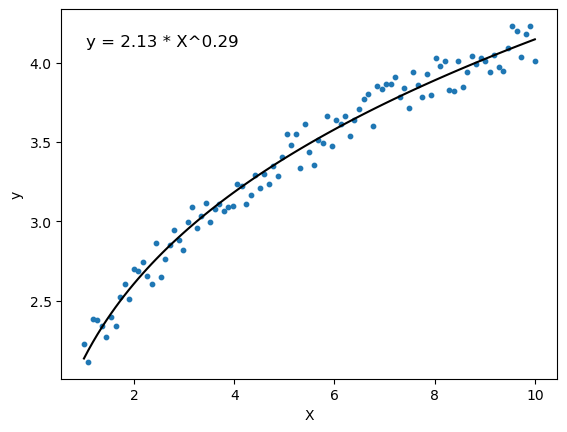

In [4]:
# !!! YOUR CODE HERE !!!

# 1. function to return the values for alpha and beta
def my_func_fit(X, y):
    """convert y(x) = alpha * x**beta to a linear function, and estimate alpha/beta using least squares"""

    # log(y) = beta * log(X) + log(alpha)
    log_y = np.log(y)

    # ln(X) and add intercept
    log_X = np.log(X).reshape(-1, 1)
    log_X_inter = np.hstack((np.ones((log_X.size, 1)), log_X))

    # solve the least squares problem
    alpha, beta = np.linalg.lstsq(log_X_inter, log_y, rcond=None)[0]
    return np.exp(alpha), beta


# 2. test my_func_fit on given X and y data
alpha, beta = my_func_fit(X, y)
print(f"alpha: {alpha:.2f}, beta: {beta:.2f}")

# 3. plot graph between X vs y, and overlay the regression line
plt.scatter(X, y, s=10)
plt.plot(X, alpha * X**beta, color="k")
plt.xlabel("X")
plt.ylabel("y")
plt.text(
    0.05,
    0.9,
    f"y = {alpha:.2f} * X^{beta:.2f}",
    fontsize=12,
    transform=plt.gca().transAxes,
);




---



### **(d)** In this problem, we ask you to 

### **#1.** Write a function `my_lin_regression(f, X, y)`, where `f` is a list containing function objects to basis functions that are pre-defined, and `X` and `y` are arrays containing noisy data. Assume that `X` and `y` are the same size, i.e, $X^{(i)}\in \mathbb{R}, y^{(i)}\in \mathbb{R}$. Return an array `beta` which represent the coefficients of the solved problem. I.e. we are solving the $\beta$ which contains the coefficients in the regressor $\hat{y}(x) = \beta_1 * f_1(x) + \beta_2 * f_2(x) + ... + \beta_n*f_n(x)$ with $f_i$ being basis functions. 

### **#2.** Also write a function `regression_plot(f,X,y,beta)` which plots a graph between `X` and `y`, and overlays it with the regression line. A few test scenarios are given to validate your code. (10 points)

In [5]:
# !!! YOUR CODE HERE !!!

# 1. transform X by basis functions, and solve the least squares problem
def my_lin_regression(f, X, y):

    # intercept + f_1(X) + f_2(X) + ... + f_n(X)
    X_transformed = np.array([np.ones(X.size)] + [f_i(X) for f_i in f]).T

    # estimate coefficients using least squares
    return np.linalg.lstsq(X_transformed, y, rcond=None)[0]


# 2. plot graph between X vs y, and overlay the regression line
def regression_plot(f, X, y, beta):

    y_hat = beta[0]
    for beta_i, f_i in zip(beta[1:], f):
        y_hat += beta_i * f_i(X)

    # plot data, and regression line
    plt.scatter(X, y, s=5)
    plt.plot(X, y_hat, color="k")
    plt.xlabel("X")
    plt.ylabel("y")


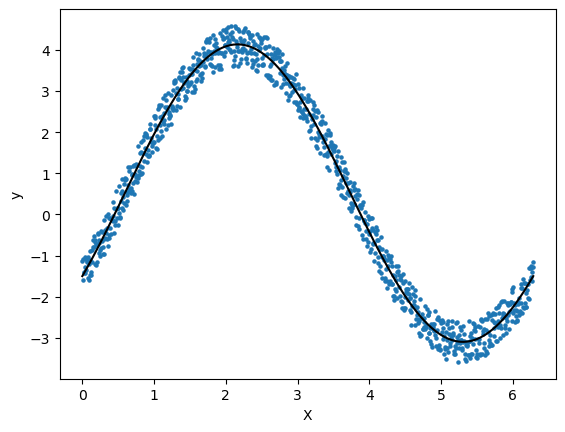

In [6]:
### !!! DO NOT EDIT !!!
### Test-1
X = np.linspace(0, 2 * np.pi, 1000)
y = 3 * np.sin(X) - 2 * np.cos(X) + np.random.random(len(X))
f = [np.sin, np.cos]  # f1 = sin, f2 = cos

beta = my_lin_regression(f, X, y)
regression_plot(f, X, y, beta)


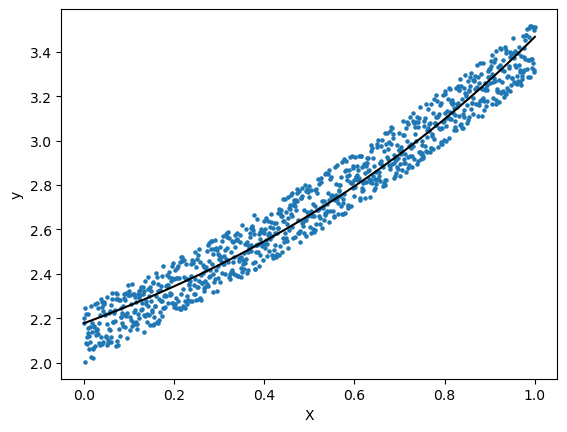

In [7]:
### !!! DO NOT EDIT !!!
### Test-2
X = np.linspace(0, 1, 1000)
y = 2 * np.exp(0.5 * X) + 0.25 * np.random.random(len(X))
f = [np.exp]  # f1 = exp

beta = my_lin_regression(f, X, y)
regression_plot(f, X, y, beta)




---



---

